<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/linear/Kaggle_Weather_in_Szeged_2006_2016_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Getting Data 

In [2]:
df=pd.read_csv("/content/weatherHistory.csv")

FileNotFoundError: ignored

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df["Humidity_2"]=df["Humidity"]

In [ ]:
df=df.drop(columns="Humidity")

In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 143
Temperature (C)               0
Apparent Temperature (C)      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               1
Loud Cover                    1
Pressure (millibars)          1
Daily Summary                 1
Humidity_2                    0
dtype: int64

In [ ]:
df["Precip Type"].value_counts()

rain    82153
snow    10698
Name: Precip Type, dtype: int64

In [ ]:
df["Precip Type"]=df["Precip Type"].replace(np.nan,"rain")

In [ ]:
df["Visibility (km)"].mean()

10.326435047796434

In [ ]:
df["Visibility (km)"]=df["Visibility (km)"].replace(np.nan,df["Visibility (km)"].mean())

In [ ]:
df["Loud Cover"] = df["Loud Cover"].replace(np.nan,df["Loud Cover"].median())

In [ ]:
df["Pressure (millibars)"]=df["Pressure (millibars)"].replace(np.nan,df["Pressure (millibars)"].mean())

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               1
Humidity_2                  0
dtype: int64

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Humidity_2
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.83


Visualisation of Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


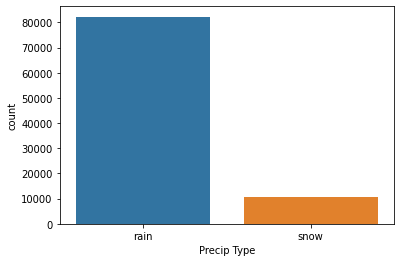

In [ ]:
plt1=sns.countplot('Precip Type',data=df)

Getting the model ready

In [ ]:
df=df.drop(columns=["Formatted Date","Summary","Daily Summary"])

In [ ]:
df["Precip Type"]=df["Precip Type"].replace("rain",1)

In [ ]:
df["Precip Type"]=df["Precip Type"].replace("snow",0)

In [ ]:
#printing the final table
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Humidity_2
0,1,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,0.89
1,1,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,0.86
2,1,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,0.89
3,1,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,0.83
4,1,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,0.83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92994 entries, 0 to 92993
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               92994 non-null  int64  
 1   Temperature (C)           92994 non-null  float64
 2   Apparent Temperature (C)  92994 non-null  float64
 3   Wind Speed (km/h)         92994 non-null  float64
 4   Wind Bearing (degrees)    92994 non-null  float64
 5   Visibility (km)           92994 non-null  float64
 6   Loud Cover                92994 non-null  float64
 7   Pressure (millibars)      92994 non-null  float64
 8   Humidity_2                92994 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 6.4 MB


In [ ]:
df.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Humidity_2
count,92994.000000,92994.000000,92994.000000,92994.000000,92994.000000,92994.000000,92994.0,92994.00000,92994.000000
mean,0.884960,11.938789,10.855958,10.834716,187.677753,10.326435,0.0,1002.80279,0.734035
std,0.319072,9.636502,10.791912,6.961468,107.631417,4.173113,0.0,118.81794,0.196235
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
25%,1.000000,4.444444,2.190278,5.779900,115.000000,8.339800,0.0,1011.83000,0.600000
50%,1.000000,12.066667,12.066667,9.982000,180.000000,10.046400,0.0,1016.38000,0.780000
75%,1.000000,18.877778,18.877778,14.151900,290.000000,14.731500,0.0,1021.17000,0.890000
max,1.000000,39.905556,39.344444,63.852600,359.000000,16.100000,0.0,1046.38000,1.000000


Splitting the data into Training and Testing 

In [ ]:
X=df.drop(columns="Apparent Temperature (C)")
Y=df["Apparent Temperature (C)"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 )

In [ ]:
print(X_train.shape,X_test.shape)

(74395, 8) (18599, 8)


In [ ]:
print(Y_train.shape,Y_test.shape)

(74395,) (18599,)


In [ ]:
from sklearn.linear_model import LinearRegression as l_reg

In [ ]:
model = l_reg()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

Accuracy

In [ ]:
x=model.predict(X_test)
x

array([25.25954268, 22.01703547, 14.95907537, ..., 28.37872766,
        2.97680499, 16.75057389])

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,x)

0.9900667511981982

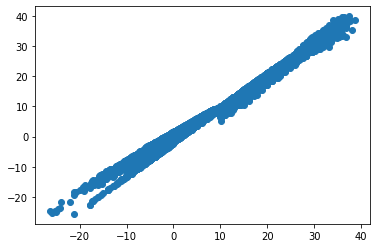

In [ ]:
plt.scatter(Y_test,x)